In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv('/content/train_knn.txt', header = None, sep = ',')
train_set

,0,1,2
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1
7,3,4,2
8,2,3,2
9,3,2,2


In [3]:
test_set = pd.read_csv('/content/test_knn.txt', header = None, sep = ',')
test_set

,0,1
0,3,7
1,7,7
2,4,3
3,2,8
4,3,5
5,1,2
6,4,8
7,8,3
8,8,4


In [4]:
train_set = train_set.to_numpy()
test_set = test_set.to_numpy()
print(train_set)
print(test_set)

[[7 7 1]
 [7 4 1]
 [6 4 1]
 [7 5 1]
 [7 6 1]
 [6 7 1]
 [6 6 1]
 [3 4 2]
 [2 3 2]
 [3 2 2]
 [4 3 2]
 [3 3 2]
 [4 4 2]
 [1 4 2]]
[[3 7]
 [7 7]
 [4 3]
 [2 8]
 [3 5]
 [1 2]
 [4 8]
 [8 3]
 [8 4]]


In [5]:
x1 = []
x2 = []
y1 = []
y2 = []

x3 = []
x4 = []
y3 = []
y4 = []

lines = []

In [6]:
for i in range(len(train_set)):
  if train_set[i, 2] == 1:
    x1.append(train_set[i, 0])
    y1.append(train_set[i, 1])
  else:
    x2.append(train_set[i, 0])
    y2.append(train_set[i, 1])

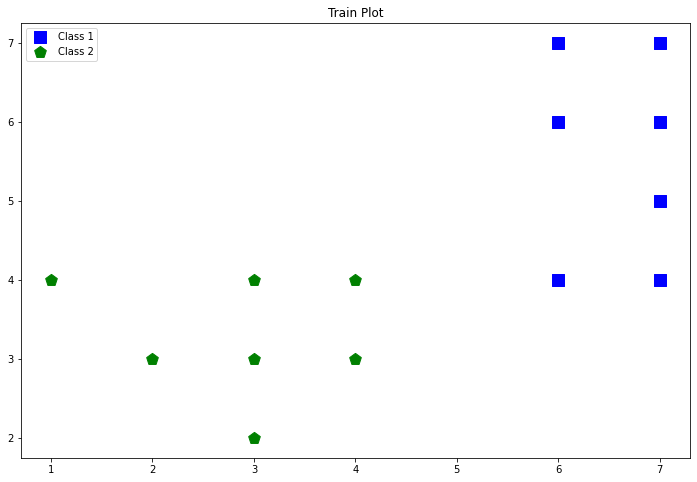

In [7]:
plt.figure(figsize = (12, 8))
plt.scatter(x1, y1, c = 'b', marker = 's', s = 150, label = 'Class 1')
plt.scatter(x2, y2, c = 'g', marker = 'p', s = 150, label = 'Class 2')
plt.title('Train Plot')
plt.legend()
plt.show()

In [8]:
while(1):
  k = int(input("Enter k between 1 and 14: "))

  if k>0 and k<15:
    break;
  else:
    print('Please enter a valid k!')

Enter k between 1 and 14: 5


In [9]:
def calculate_distance(row1, row2):
  distance = 0
  for i in range(len(row2)-1):
    distance += (row1[i] - row2[i])**2
  return distance

In [10]:
def get_neighbors(test_row):
  distances = []
  for i in range(len(train_set)):
    train_row = []
    train_row.append(train_set[i, 0])
    train_row.append(train_set[i, 1])
    train_row.append(train_set[i, 2])
    dist = calculate_distance(test_row, train_row)
    distances.append([dist, train_row])

  distances.sort() 
  neighbors = []
  
  for i in range(k):
    neighbors.append(distances[i])

  return neighbors

In [11]:
def predict_class(test_row):
  neighbors = get_neighbors(test_row)
  output_values = [row[1][2] for row in neighbors]
  predicted_value = max(set(output_values), key=output_values.count)

  # Prediction.txt
  line = 'Test point: ' + str(test_row[0]) + ', ' + str(test_row[1]) + '\n'
  lines.append(line)

  for i in range(len(neighbors)):
    line = 'Distance ' + str(i+1) + ': '+ str(neighbors[i][0]) + '\tClass: ' + str(neighbors[i][1][2]) + '\n'
    lines.append(line)

  line = 'Predicted class: ' + str(predicted_value) + '\n\n'
  lines.append(line)

  return predicted_value

In [12]:
for i in range(len(test_set)):
  predicted_class = predict_class(test_set[i])

  if predicted_class == 1:
    x3.append(test_set[i, 0])
    y3.append(test_set[i, 1])
  else:
    x4.append(test_set[i, 0])
    y4.append(test_set[i, 1])

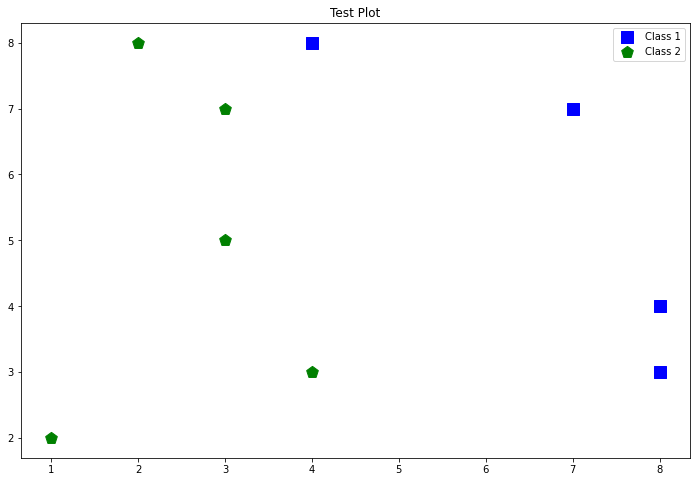

In [13]:
plt.figure(figsize = (12, 8))
plt.scatter(x3, y3, c = 'b', marker = 's', s = 150, label = 'Class 1')
plt.scatter(x4, y4, c = 'g', marker = 'p', s = 150, label = 'Class 2')
plt.title('Test Plot')
plt.legend()
plt.show()

In [14]:
with open('prediction.txt', 'w') as f:
    f.writelines(lines)
    f.close()